Disciplina: **Mineração de Dados**

Professor: **Wilson Castello Branco Neto**

Aula 2 - Atividade 1: Salário por país e raça.

Nome: Wilson Castello Branco Neto

**Dataset**: Salary dataset based on country and race

Original em: https://www.kaggle.com/datasets/sudheerp2147234/salary-dataset-based-on-country-and-race

Para a atividade baixe o dataset disponível no site da disciplina, pois ele sofreu algumas alterações.

Após ler o dataset implemente as funções solicitadas. Sempre que for solicitada a criação de um gráfico, deve-se gerar duas versões do mesmo gráfico, uma usando o matplotlib e outra usando o seaborn.


1.  Apresente as estatísticas básicas das variáveis quantitativas usando o método describe do dataframe.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('datasets\\atv2.csv')
df.describe()

,Age,Years of Experience,Salary
count,5118.000000,5118.000000,5118.000000
mean,33.929660,8.265631,113722.941579
std,7.703118,6.165074,51858.887848
min,21.000000,0.000000,25000.000000
25%,28.000000,3.000000,68118.000000
50%,32.000000,7.000000,110707.000000
75%,39.000000,12.000000,160000.000000
max,62.000000,34.000000,219000.000000


In [2]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


2.  Calcule das estatísticas básicas do atributo idade (Age) usando as funções do Pandas e compare com as geradas pelo método describe.

In [3]:
count = df['Age'].count()
soma = df['Age'].sum()
mean = df['Age'].mean()
median = df['Age'].median()
mode = df['Age'].mode()[0]
std_dev = df['Age'].std()
variance = df['Age'].var()
q1 = df['Age'].quantile(0.25)
q2 = df['Age'].quantile(0.50)
q3 = df['Age'].quantile(0.75)
min_value = df['Age'].min()
max_value = df['Age'].max()
print(f"Count: {count}, Sum: {soma}, Mean: {mean}, Median: {median}, Mode: {mode}, Std Dev: {std_dev}, Variance: {variance}, Q1: {q1}, Q2: {q2}, Q3: {q3}, Min: {min_value}, Max: {max_value}")

Count: 5118, Sum: 173652.0, Mean: 33.92966002344666, Median: 32.0, Mode: 27.0, Std Dev: 7.703117921974451, Variance: 59.33802571984398, Q1: 28.0, Q2: 32.0, Q3: 39.0, Min: 21.0, Max: 62.0


3.  Crie o histograma de frequência para as variáveis Idade (Age) e Salário (Salary), usando a fórmula de Sturges.

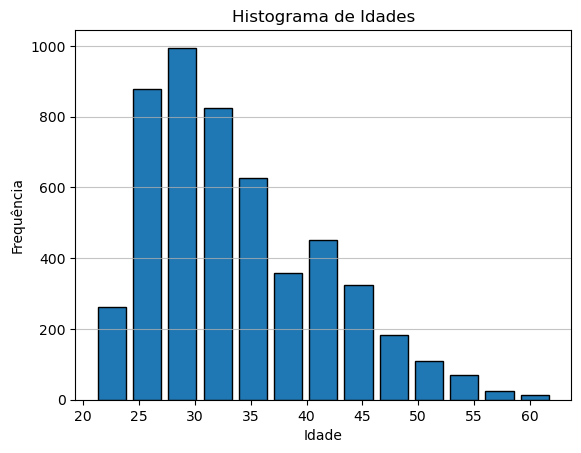

In [4]:
idades = df['Age']
classes = int(1 + np.log2(idades.count()))

plt.hist(idades, bins=classes, edgecolor='black', rwidth=0.8)
plt.title('Histograma de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

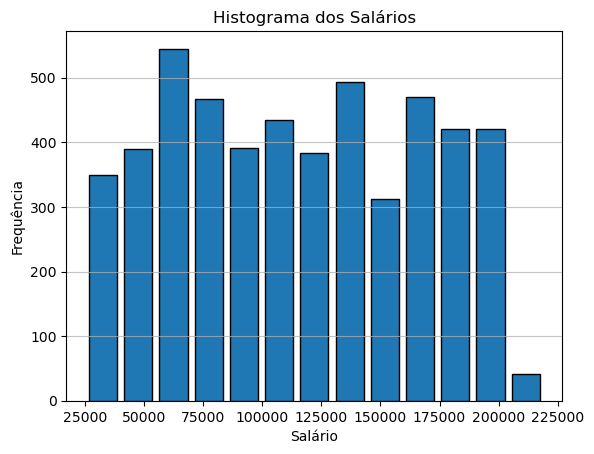

In [5]:
salarios = df['Salary']
classes = int(1 + np.log2(salarios.count()))

plt.hist(salarios, bins=classes, edgecolor='black', rwidth=0.8)
plt.title('Histograma dos Salários')
plt.xlabel('Salário')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

4. Crie o boxplot e o gráfico de violino para as coluna salário e verifique se ela possui algum outlier.

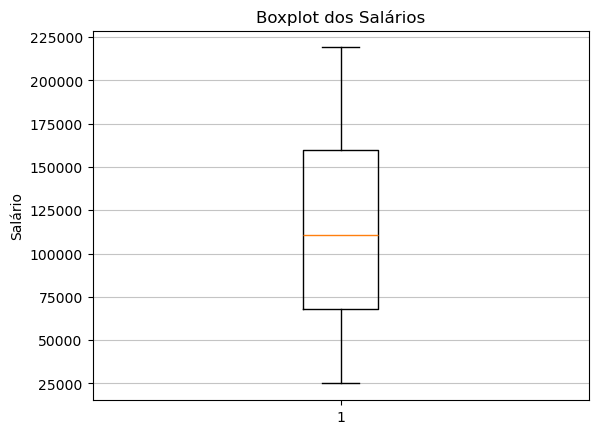

In [6]:
salarios = df['Salary']
plt.boxplot(salarios)
plt.title('Boxplot dos Salários')
plt.ylabel('Salário')
plt.grid(axis='y', alpha=0.75)
plt.show()

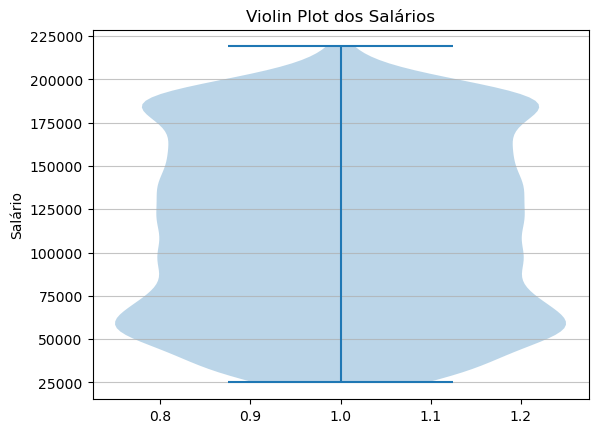

In [7]:
salarios = df['Salary']
plt.violinplot(salarios)
plt.title('Violin Plot dos Salários')
plt.ylabel('Salário')
plt.grid(axis='y', alpha=0.75)
plt.show()

5. Calcule o coeficiente de correlação (pearson) entre todas as variáveis quantitativas e analise o seu resultado. Apresente também o mapa de calor.

In [8]:
corr = df.corr(method='pearson', numeric_only=True)
corr

,Age,Years of Experience,Salary
Age,1.000000,0.936098,0.738375
Years of Experience,0.936098,1.000000,0.811434
Salary,0.738375,0.811434,1.000000


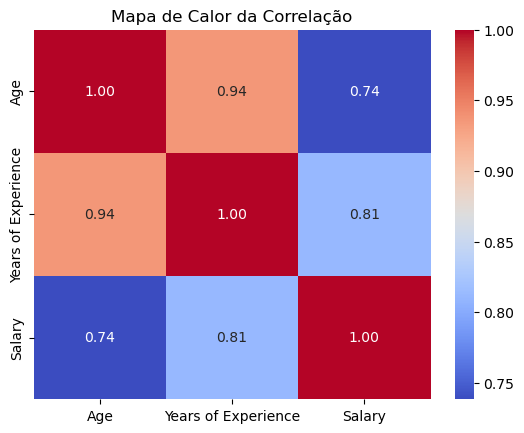

In [9]:
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor da Correlação')
plt.show()


6. Elabore o diagrama de dispersão para mostras as relações abaixo e analise os resultados, comparando com os coeficientes de correlação calculados anteriormente.


*   Idade - Tempo de Experiência
*   Idade - Salário
*   Tempo de Experiência e Salário.



In [10]:
idades = df['Age']
salarios = df['Salary']
experiencia = df['Years of Experience']

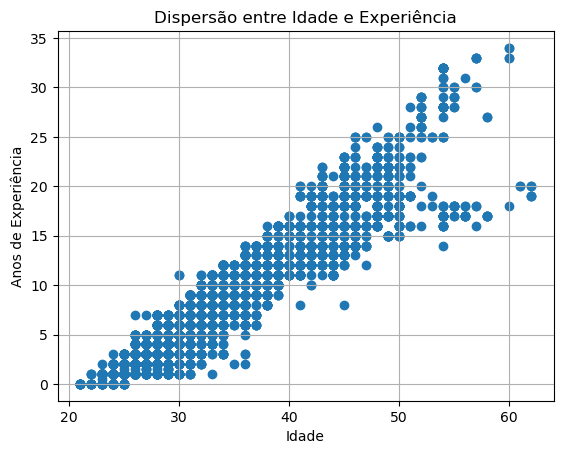

In [11]:
plt.scatter(idades, experiencia)
plt.title('Dispersão entre Idade e Experiência')
plt.xlabel('Idade')
plt.ylabel('Anos de Experiência')
plt.grid(True)
plt.show()

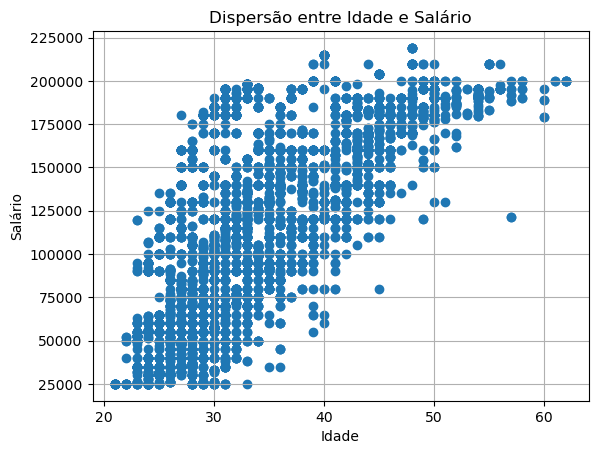

In [12]:
plt.scatter(idades, salarios)
plt.title('Dispersão entre Idade e Salário')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.grid(True)
plt.show()

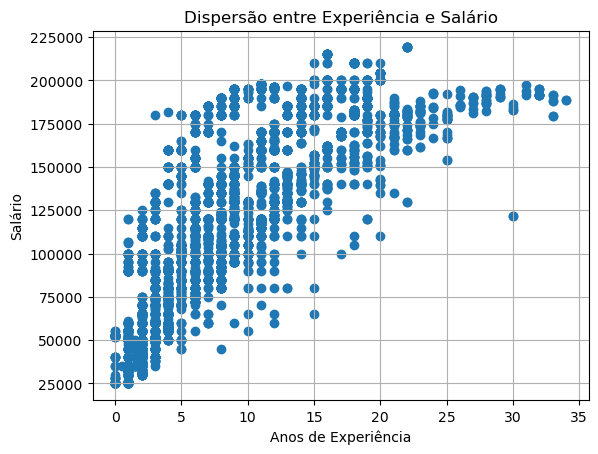

In [13]:
plt.scatter(experiencia, salarios)
plt.title('Dispersão entre Experiência e Salário')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.grid(True)
plt.show()

7. Apresente a quantidade de pessoas de cada nível educacional (tabela e gráfico de colunas).

In [14]:
agrupadoEducacao = df.groupby(['Education Level'])
qtdeAgrupadoEducacao = agrupadoEducacao.size()
qtdeAgrupadoEducacao

Education Level
Bachelor's     2251
High School     336
Master's       1480
PhD            1051
dtype: int64

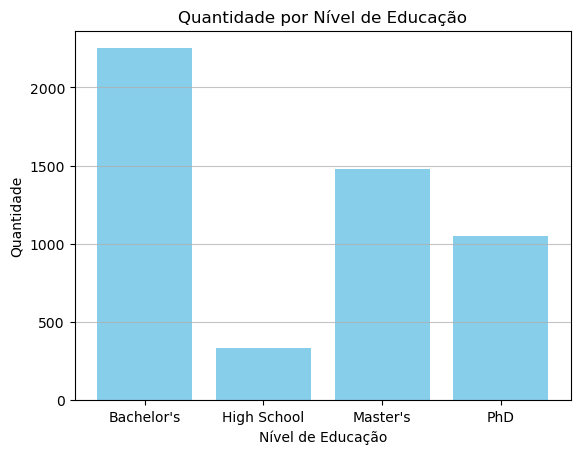

In [15]:
plt.bar(qtdeAgrupadoEducacao.index, qtdeAgrupadoEducacao.values, color='skyblue') # type: ignore
plt.title('Quantidade por Nível de Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Quantidade')
plt.grid(axis='y', alpha=0.75)
plt.show()

8. Apresente a quantidade de pessoas por por raça (apenas o gráfico de barras)


In [16]:
agrupadoRaca = df.groupby(['Race'])
qtdeAgrupadoRaca = agrupadoRaca.size()
qtdeAgrupadoRaca

Race
African American     265
Asian               1217
Australian           358
Black                325
Chinese              330
Hispanic             259
Korean               339
Mixed                258
Welsh                263
White               1504
dtype: int64

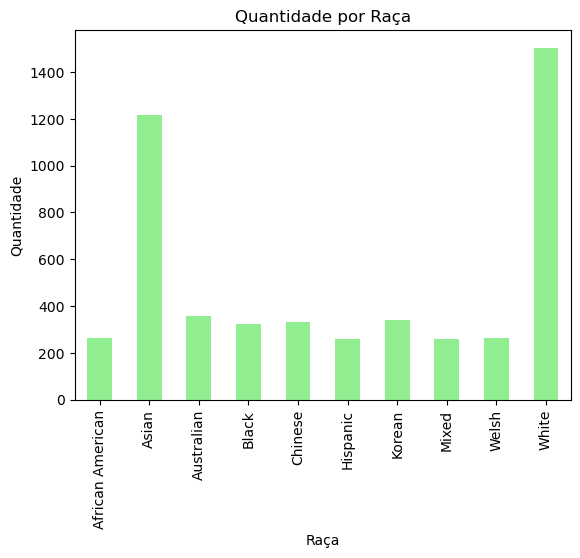

In [17]:
qtdeAgrupadoRaca.plot.bar('Race', color='lightgreen')
plt.title('Quantidade por Raça')
plt.xlabel('Raça')
plt.ylabel('Quantidade')
plt.show()

9. Apresente a quantidade de pessoas por país (apenas o gráfico de pizza)

In [18]:
qtdeAgrupadoPais = df.groupby(['Country']).size()
qtdeAgrupadoPais

Country
Australia    1019
Canada        977
China        1005
UK           1048
USA          1069
dtype: int64

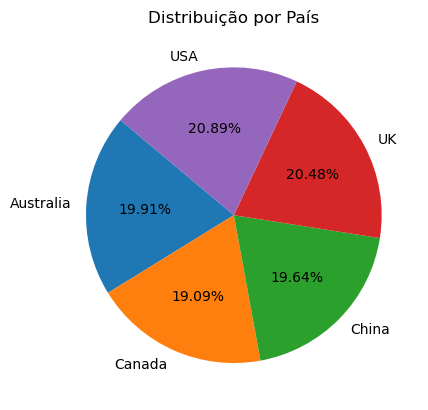

In [19]:
#plt.pie(qtdeAgrupadoPais.values, labels=qtdeAgrupadoPais.index, autopct='%0.2f%%', startangle=140) 
qtdeAgrupadoPais.plot.pie(autopct='%0.2f%%', startangle=140) # type: ignore
plt.title('Distribuição por País')
plt.show()

10. Apresente o salário médio agrupado por gênero (tabela e gráfico de barras)

In [20]:
agrupadoPorGenero = df.groupby(['Gender'])
salarioAgrupadoPorGenero = agrupadoPorGenero['Salary'].mean()
salarioAgrupadoPorGenero

Gender
Female    106807.706285
Male      119543.285354
Name: Salary, dtype: float64

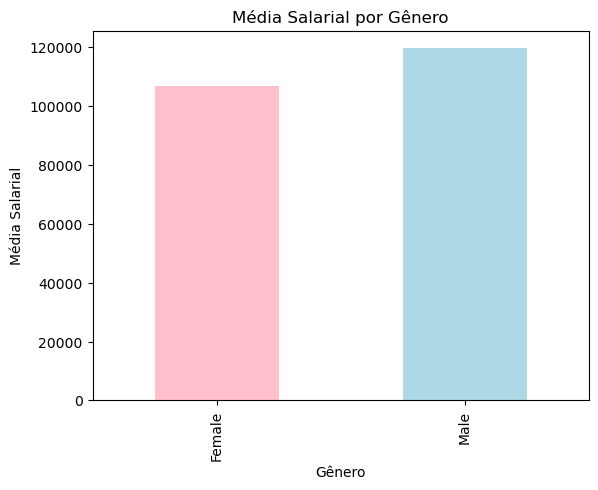

In [21]:
salarioAgrupadoPorGenero.plot.bar(color=['pink', 'lightblue'])
plt.title('Média Salarial por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média Salarial')
plt.show()

11. Apresente a variação do salário médio agrupado por gênero (gráfico de violino)



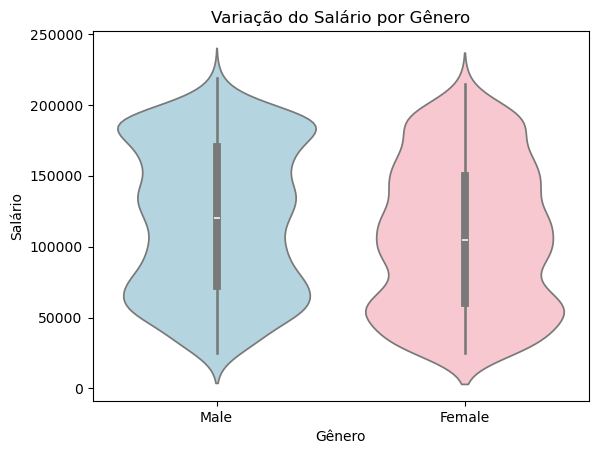

In [22]:
sns.violinplot(x='Gender', y='Salary', data=df, inner="box", palette=['lightblue', 'pink'], hue='Gender', legend=False)
plt.title('Variação do Salário por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Salário')
plt.show()

12. Apresente o salário médio agrupado por nível educacional e gênero (tabela) e os gráficos de colunas. Os primeiros gráficos devem apresentar o nível educacional no eixo x e o gênero como legenda de cores e as barras devem ser agrupadas. Outro gráfico deve apresentar o gênero no eixo x e o nível educacional na legenda de cores. Este gráfico deve apresentar as colunas empilhadas.

In [23]:
dfEducacaoGenero = df.groupby(['Education Level', 'Gender'])
salarioAgrupadoGeneroEducacao = dfEducacaoGenero['Salary'].mean().unstack()
salarioAgrupadoGeneroEducacao

Gender,Female,Male
Education Level,,
Bachelor's,86953.180840,97329.489410
High School,32175.449438,40281.259494
Master's,120300.486905,138653.406250
PhD,158836.941327,164550.206373


In [24]:
salarioAgrupadoGeneroEducacao = dfEducacaoGenero['Salary'].mean().reset_index()
salarioAgrupadoGeneroEducacao

,Education Level,Gender,Salary
0,Bachelor's,Female,86953.180840
1,Bachelor's,Male,97329.489410
2,High School,Female,32175.449438
3,High School,Male,40281.259494
4,Master's,Female,120300.486905
5,Master's,Male,138653.406250
6,PhD,Female,158836.941327
7,PhD,Male,164550.206373


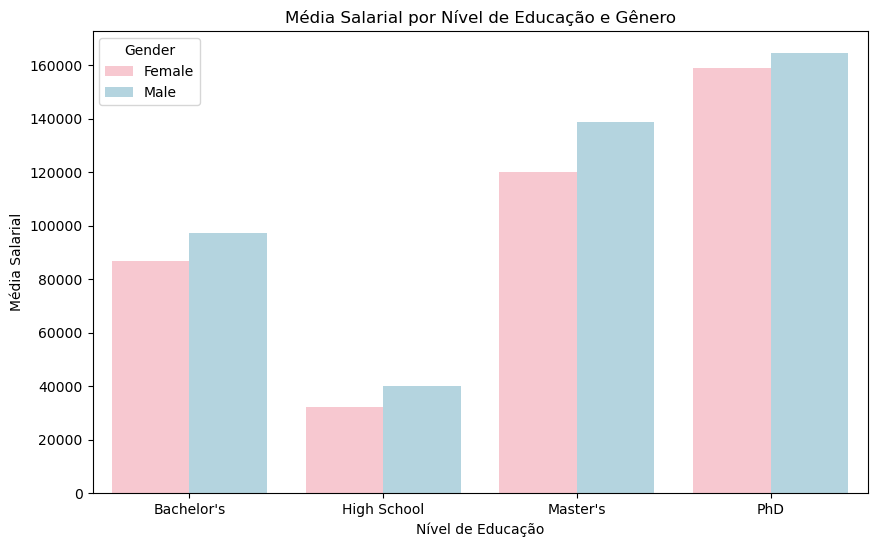

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Education Level', y='Salary', hue='Gender', data=salarioAgrupadoGeneroEducacao, palette=['pink', 'lightblue'])
plt.title('Média Salarial por Nível de Educação e Gênero')
plt.xlabel('Nível de Educação')
plt.ylabel('Média Salarial')
plt.show()

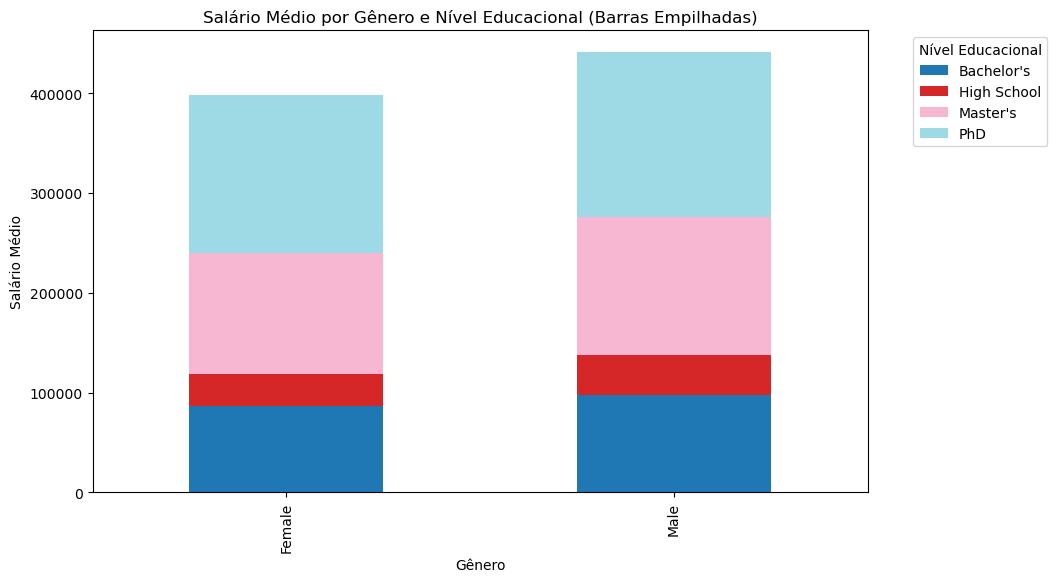

In [26]:
pivot_df = salarioAgrupadoGeneroEducacao.pivot(index='Gender', columns='Education Level', values='Salary')
pivot_df.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    colormap="tab20"
)
plt.title("Salário Médio por Gênero e Nível Educacional (Barras Empilhadas)")
plt.ylabel("Salário Médio")
plt.xlabel("Gênero")
plt.legend(title="Nível Educacional", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

<Axes: >

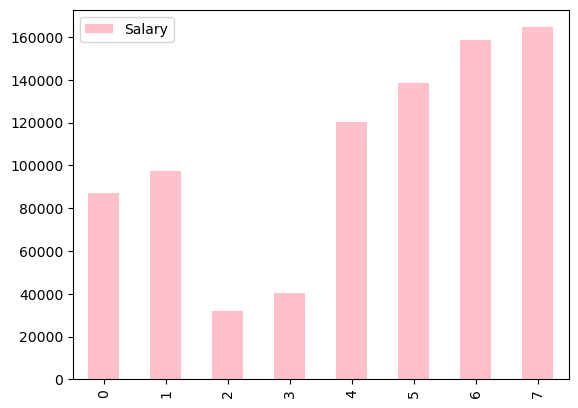

In [27]:
salarioAgrupadoGeneroEducacao.plot.bar(color=['pink', 'lightblue'])